In [1]:
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
files = glob("../csv/例題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/例題_データアナリティクス基礎\例題10_自由記述データ&形態素解析データ.xlsx
1 ../csv/例題_データアナリティクス基礎\例題11_乱数で発生させた分布の基本統計量.xlsx
2 ../csv/例題_データアナリティクス基礎\例題1_自転車データ.xlsx
3 ../csv/例題_データアナリティクス基礎\例題2_顧客ID付き食品購入データ.xlsx
4 ../csv/例題_データアナリティクス基礎\例題3_テレビ視聴アンケートデータ.xlsx
5 ../csv/例題_データアナリティクス基礎\例題4_5つの地域の事業所数.xlsx
6 ../csv/例題_データアナリティクス基礎\例題5_関東地方の人口データ.xlsx
7 ../csv/例題_データアナリティクス基礎\例題7_異なる授業形態による成績データ.xlsx
8 ../csv/例題_データアナリティクス基礎\例題8_遊園地テーマパーク入場者数.xlsx
9 ../csv/例題_データアナリティクス基礎\例題9_店舗別販売額.xlsx


In [10]:
df1 = pd.read_excel(files[0], sheet_name=0)
print(df1.columns)
df1.columns = ['id', 'gender', 'age', 'impression']
df1.head()

Index(['ID', '性別', '年齢', 'スマートフォンに対する印象'], dtype='object')


,id,gender,age,impression
0,1,男性,27,必要な気がするけれど、束縛間も感じさせる
1,2,男性,25,忘れたら絶対取りに帰る。仕事にもプライベートにも使う。
2,3,女性,21,絶対大事
3,4,男性,28,なくても結構いける
4,5,女性,20,手から離せない。ライフライン。


In [3]:
df2 = pd.read_excel(files[0], sheet_name=1)
print(df2.columns)
# df2.columns = ['id', 'customer_id', 'price', 'food', 'weekday', 'gender']
df2.head()

Index(['ID', '性別', '辞書', '文境界', '書字形（＝表層形）', '語彙素', '語彙素読み', '品詞', '大分類',
       '中分類', '小分類', '細分類', '活用型', '活用形', '発音形出現形', '仮名形出現形', '語種', '書字形(基本形)',
       '発音形(基本形)', '仮名形(基本形)', '語形(基本形)'],
      dtype='object')


,ID,性別,辞書,文境界,書字形（＝表層形）,語彙素,語彙素読み,品詞,大分類,中分類,...,細分類,活用型,活用形,発音形出現形,仮名形出現形,語種,書字形(基本形),発音形(基本形),仮名形(基本形),語形(基本形)
0,1,男性,現代語,B,必要,必要,ヒツヨウ,名詞-普通名詞-形状詞可能,名詞,普通名詞,...,NaN,NaN,NaN,ヒツヨー,ヒツヨウ,漢,必要,ヒツヨー,ヒツヨウ,ヒツヨウ
1,1,男性,現代語,I,な,だ,ダ,助動詞,助動詞,NaN,...,NaN,助動詞-ダ,連体形-一般,ナ,ナ,和,だ,ダ,ダ,ダ
2,1,男性,現代語,I,気,気,キ,名詞-普通名詞-一般,名詞,普通名詞,...,NaN,NaN,NaN,キ,キ,漢,気,キ,キ,キ
3,1,男性,現代語,I,が,が,ガ,助詞-格助詞,助詞,格助詞,...,NaN,NaN,NaN,ガ,ガ,和,が,ガ,ガ,ガ
4,1,男性,現代語,I,する,為る,スル,動詞-非自立可能,動詞,非自立可能,...,NaN,サ行変格,終止形-一般,スル,スル,和,する,スル,スル,スル


- 性別 == 男性 and 大分類 == 名詞
- 性別 == 女性 and 大分類 == 名詞

In [59]:
# 性別 == 男性 and 大分類 == 名詞
print(df2.query('性別 == "男性" and 大分類 == "名詞"').count()['ID'])
# 性別 == 女性 and 大分類 == 名詞
print(df2.query('性別 == "女性" and 大分類 == "名詞"').count()['ID'])

53
34


In [134]:
# 平均出現回数の男女差
noun = df2[df2['大分類'] == '名詞']
noun_gender = noun.pivot_table(index=['性別', 'ID'], columns='大分類', aggfunc='count')['中分類']
print(abs(noun_gender.loc['女性'].mean() - noun_gender.loc['男性'].mean()))
# noun_gender

大分類
名詞    0.284314
dtype: float64


In [135]:
# 男女ともに2回以上出現
noun_aaa =  noun.pivot_table(index='書字形（＝表層形）', columns='性別', aggfunc='count')['ID']
noun_aaa.query('女性 >= 2 and 男性 >= 2')

性別,女性,男性
書字形（＝表層形）,,
便利,2.0,5.0


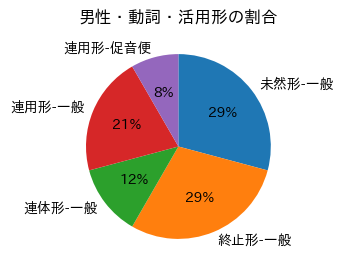

In [138]:
# 男性・動詞・活用形の割合
verb_men = df2.query('大分類 == "動詞" and 性別 == "男性"')
graph_date = verb_men.groupby('活用形').count()['ID']
plt.figure(figsize=(3, 3))
label = [i for i in range(5)]
plt.pie(graph_date, labels=graph_date.index, autopct='%.0f%%', startangle=90, counterclock=False)
plt.title('男性・動詞・活用形の割合')
plt.legend
plt.show()

In [139]:
noun_women = df2.query('性別 == "女性" and 大分類 == "名詞"')
noun_women_table = noun_women.pivot_table(index='ID', columns='書字形(基本形)', aggfunc='count')
noun_women_table['辞書'][['必需', '便利']].fillna(0).corr()

書字形(基本形),必需,便利
書字形(基本形),,
必需,1.000000,0.258199
便利,0.258199,1.000000
